In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# Time: 4 seconds
df_inmuebles = pd.read_csv('Data/inmuebles_full.csv')

In [21]:
df_inmuebles

,id,fecha_creacion,latitud,longitud,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,direccion,anos_antiguedad,tipo_inmueble,tiponegocio
0,3669162,2022-03-02,3.364000,-76.495003,VALLE DEL CAUCA,CALI,3.0,2,81.0,2.640000e+08,0,1,Carrera 99A # 45 - 200 Apto 706 Torre 3 Lili d...,12,apartamento,venta
1,3067524,2021-12-12,6.143000,-75.601997,ANTIOQUIA,SABANETA,2.0,3,90.0,4.600000e+08,1,2,Calle 70A SUR # 35 - 340 Apto 3402 Urbanizacio...,4,apartamento,venta
2,3944108,2022-03-18,4.898660,-74.043427,CUNDINAMARCA,CAJICÁ,3.0,4,140.0,1.000000e+09,0,4,abaco,4,casa,venta
3,500215,2020-07-23,6.120840,-75.425949,ANTIOQUIA,RIONEGRO,3.0,2,75.0,1.600000e+06,0,1,CALLE 32 52B- 150,1,apartamento,arriendo
4,741346,2020-09-15,4.939520,-73.982620,CUNDINAMARCA,SOPÓ,4.0,5,750.0,3.300000e+09,0,6,AUTOPISTA NORTE KM 33,12,casa,venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882883,2904716,2021-11-25,4.790029,-71.335388,CASANARE,OROCUÉ,3.0,1,290.0,3.000000e+05,0,4,Calle 3 No. 19 -21,4,casa,arriendo
882884,1599348,2021-04-11,12.582863,-81.689812,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,2.0,2,65.0,4.650000e+08,1,1,carrera 1b#1-113,12,apartamento,venta
882885,2215580,2021-10-07,12.573000,-81.706001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,1.0,1,68.0,6.900000e+08,1,1,Avenida 12A # 1 - 141,12,apartamento,venta
882886,2901914,2021-11-25,-4.193928,-69.945770,AMAZONAS,LETICIA,3.0,2,125.0,1.300000e+06,0,1,Km 2 Vía Los Lagos,12,casa,arriendo


In [22]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882888 entries, 0 to 882887
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               882888 non-null  int64  
 1   fecha_creacion   882888 non-null  object 
 2   latitud          882888 non-null  float64
 3   longitud         882888 non-null  float64
 4   departamento     882888 non-null  object 
 5   municipio        882888 non-null  object 
 6   habitaciones     882147 non-null  float64
 7   banos            882888 non-null  int64  
 8   area             882888 non-null  float64
 9   precio           860683 non-null  float64
 10  num_ascensores   882888 non-null  int64  
 11  garajes          882888 non-null  int64  
 12  direccion        882664 non-null  object 
 13  anos_antiguedad  882888 non-null  int64  
 14  tipo_inmueble    882888 non-null  object 
 15  tiponegocio      882888 non-null  object 
dtypes: float64(5), int64(5), object(6)
mem

## Primeros Filtros

In [23]:
# Create the geometry of the point - from longitud and latitud columns
# df_inmuebles['geometry'] = gpd.points_from_xy(x=df_inmuebles['longitud'], y=df_inmuebles['latitud'])

# Create a new variable precio por m2
df_inmuebles['precio_m2'] = df_inmuebles['precio'] / df_inmuebles['area']

# Make it a GeoDataFrame
# df_inmuebles = gpd.GeoDataFrame(df_inmuebles, geometry='geometry')

# Filtrar filas sin habitaciones, al ser una de las variables claves no se analizan posibles imputaciones para no dañar la muestra
df_inmuebles = df_inmuebles[~df_inmuebles['habitaciones'].isna()]

# Habitaciones como entero
df_inmuebles['habitaciones'] = df_inmuebles['habitaciones'].astype('int64')

# Solo negocios de venta
df_inmuebles = df_inmuebles[df_inmuebles['tiponegocio'] == 'venta']

# Drop useless columns
df_inmuebles.drop(['latitud', 'longitud', 'fecha_creacion', 'direccion', 'tiponegocio'], axis=1, inplace=True)

C:\Users\SGM\AppData\Local\Temp\ipykernel_11096\3524908328.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inmuebles['habitaciones'] = df_inmuebles['habitaciones'].astype('int64')


In [24]:
df_inmuebles

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,precio_m2
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,3.259259e+06
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,5.111111e+06
2,3944108,CUNDINAMARCA,CAJICÁ,3,4,140.0,1.000000e+09,0,4,4,casa,7.142857e+06
4,741346,CUNDINAMARCA,SOPÓ,4,5,750.0,3.300000e+09,0,6,12,casa,4.400000e+06
5,1556370,CUNDINAMARCA,ZIPAQUIRÁ,3,3,86.0,2.700000e+08,0,1,4,casa,3.139535e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
882881,1033723,CASANARE,YOPAL,2,2,37.0,1.400000e+08,0,1,4,casa,3.783784e+06
882882,133765,CASANARE,YOPAL,7,3,520.0,5.000000e+08,0,1,12,casa,9.615385e+05
882884,1599348,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,2,2,65.0,4.650000e+08,1,1,12,apartamento,7.153846e+06
882885,2215580,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,1,1,68.0,6.900000e+08,1,1,12,apartamento,1.014706e+07


In [16]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634414 entries, 0 to 882887
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               634414 non-null  int64  
 1   departamento     634414 non-null  object 
 2   municipio        634414 non-null  object 
 3   habitaciones     634414 non-null  int64  
 4   banos            634414 non-null  int64  
 5   area             634414 non-null  float64
 6   precio           634414 non-null  float64
 7   num_ascensores   634414 non-null  int64  
 8   garajes          634414 non-null  int64  
 9   anos_antiguedad  634414 non-null  int64  
 10  tipo_inmueble    634414 non-null  object 
 11  precio_m2        634414 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 62.9+ MB


## Departamento

In [16]:
a = df_inmuebles.groupby(['departamento']).agg(count=('id', 'count')).sort_values(by='count', ascending=False)
a['perc'] = a['count'] / a['count'].sum()
a['cum_perc'] = a['perc'].cumsum()
a

,count,perc,cum_perc
departamento,,,
"BOGOTÁ, D.C.",256652,0.404550,0.404550
ANTIOQUIA,129074,0.203454,0.608004
VALLE DEL CAUCA,63178,0.099585,0.707588
CUNDINAMARCA,44677,0.070422,0.778011
ATLÁNTICO,29007,0.045723,0.823733
SANTANDER,21609,0.034061,0.857795
RISARALDA,18689,0.029459,0.887253
CALDAS,12627,0.019903,0.907157
NORTE DE SANTANDER,12162,0.019170,0.926327


## Municipio

In [17]:
len(df_inmuebles['municipio'].unique())

599

In [18]:
a = df_inmuebles.groupby(['municipio']).agg(count=('id', 'count')).sort_values(by='count', ascending=False)
a['perc'] = a['count'] / a['count'].sum()
a['cum_perc'] = a['perc'].cumsum()

a['filtro'] = 0
a.loc[a['cum_perc'] <= 0.8, 'filtro'] = 1
a.reset_index(inplace=True)
a.head(30)

,municipio,count,perc,cum_perc,filtro
0,"BOGOTÁ, D.C.",256652,0.404550,0.404550,1
1,MEDELLÍN,66390,0.104648,0.509197,1
2,CALI,53792,0.084790,0.593988,1
3,BARRANQUILLA,25978,0.040948,0.634936,1
4,ENVIGADO,22605,0.035631,0.670567,1
5,PEREIRA,14331,0.022589,0.693156,1
6,BUCARAMANGA,12807,0.020187,0.713343,1
7,SABANETA,12153,0.019156,0.732500,1
8,MANIZALES,11317,0.017839,0.750338,1
9,CARTAGENA DE INDIAS,11108,0.017509,0.767847,1


In [25]:
df_inmuebles = pd.merge(
    df_inmuebles,
    a[['municipio', 'filtro']],
    how='left',
    on='municipio',
)

In [26]:
df_inmuebles.loc[df_inmuebles['filtro'] == 0, 'municipio'] = 'Otro'

In [26]:
df_inmuebles

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,precio_m2,filtro
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,3.259259e+06,1
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,5.111111e+06,1
2,3944108,CUNDINAMARCA,CAJICÁ,3,4,140.0,1.000000e+09,0,4,4,casa,7.142857e+06,0
3,741346,CUNDINAMARCA,SOPÓ,4,5,750.0,3.300000e+09,0,6,12,casa,4.400000e+06,0
4,1556370,CUNDINAMARCA,ZIPAQUIRÁ,3,3,86.0,2.700000e+08,0,1,4,casa,3.139535e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634409,1033723,CASANARE,YOPAL,2,2,37.0,1.400000e+08,0,1,4,casa,3.783784e+06,0
634410,133765,CASANARE,YOPAL,7,3,520.0,5.000000e+08,0,1,12,casa,9.615385e+05,0
634411,1599348,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,2,2,65.0,4.650000e+08,1,1,12,apartamento,7.153846e+06,0
634412,2215580,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,1,1,68.0,6.900000e+08,1,1,12,apartamento,1.014706e+07,0


In [29]:
df_inmuebles[df_inmuebles['filtro'] == 1]

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,precio_m2,count,perc,cum_perc,filtro
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,3.259259e+06,53792,0.084790,0.593988,1
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,5.111111e+06,12153,0.019156,0.732500,1
8,3871584,VALLE DEL CAUCA,CALI,3,2,90.0,3.200000e+08,1,1,4,apartamento,3.555556e+06,53792,0.084790,0.593988,1
15,3672893,ANTIOQUIA,SABANETA,3,3,106.0,5.410000e+08,1,2,4,apartamento,5.103774e+06,12153,0.019156,0.732500,1
17,3270265,RISARALDA,PEREIRA,3,2,70.0,2.700000e+08,1,1,4,apartamento,3.857143e+06,14331,0.022589,0.693156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633866,3723643,VALLE DEL CAUCA,CALI,3,5,560.0,3.500000e+09,0,3,12,casa,6.250000e+06,53792,0.084790,0.593988,1
633867,3110672,VALLE DEL CAUCA,CALI,3,5,164.0,7.850000e+08,0,2,12,casa,4.786585e+06,53792,0.084790,0.593988,1
633868,3732760,VALLE DEL CAUCA,CALI,5,5,668.0,1.000000e+09,0,4,4,casa,1.497006e+06,53792,0.084790,0.593988,1
633869,768224,VALLE DEL CAUCA,CALI,3,4,132.0,5.500000e+08,1,2,4,apartamento,4.166667e+06,53792,0.084790,0.593988,1


In [28]:
a = df_inmuebles.groupby(['municipio']).agg(count=('id', 'count')).sort_values(by='count', ascending=False)
a['perc'] = a['count'] / a['count'].sum()
a['cum_perc'] = a['perc'].cumsum()
a.head(30)

,count,perc,cum_perc
municipio,,,
"BOGOTÁ, D.C.",256652,0.404550,0.404550
Otro,127215,0.200524,0.605073
MEDELLÍN,66390,0.104648,0.709721
CALI,53792,0.084790,0.794511
BARRANQUILLA,25978,0.040948,0.835459
ENVIGADO,22605,0.035631,0.871090
PEREIRA,14331,0.022589,0.893680
BUCARAMANGA,12807,0.020187,0.913867
SABANETA,12153,0.019156,0.933023


## Habitaciones

In [34]:
df_inmuebles.groupby(['habitaciones']).agg(count=('id', 'count'))

,count
habitaciones,
0,521
1,24541
2,89316
3,284628
4,74719
5,17511
6,6813
7,3368
8,2483


<Axes: >

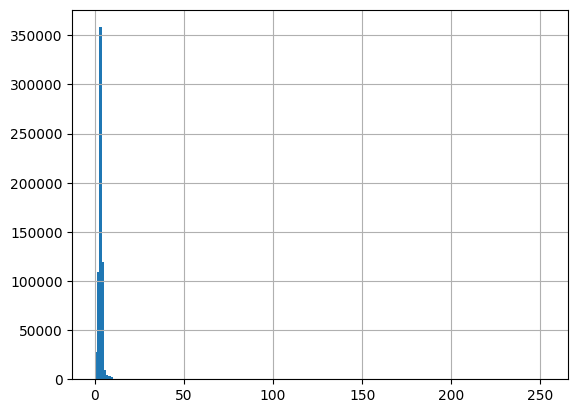

In [20]:
df_inmuebles['habitaciones'].hist(bins=200)

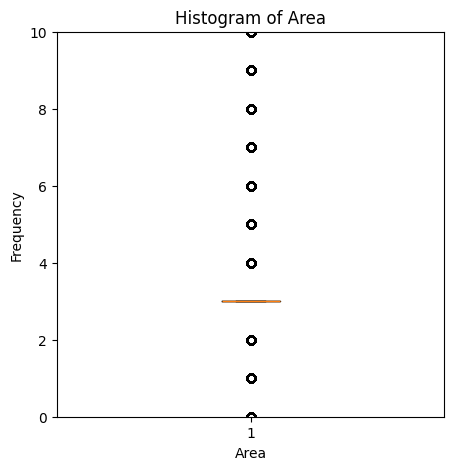

In [21]:
# Create a histogram of the 'area' column
plt.figure(figsize=(5, 5))
plt.boxplot(df_inmuebles['habitaciones'])

# Set the x-axis limits
# plt.xlim(0, 1000)  # Set xlim to desired values
plt.ylim(0, 10)
# plt.ylim(0, 50)

# Add titles and labels
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [22]:
Q1 = df_inmuebles['habitaciones'].quantile(0.25)
Q2 = df_inmuebles['habitaciones'].quantile(0.50)
Q3 = df_inmuebles['habitaciones'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 3.0
Median (50th percentile): 3.0
Q3 (75th percentile): 3.0
IQR (Interquartile Range): 0.0
Lower Whisker: 3.0
Upper Whisker: 3.0


In [30]:
# Filtrar las filas con 0 habitaciones y más de 10 habitaciones
df_inmuebles = df_inmuebles[(df_inmuebles['habitaciones'] >= 1) & ((df_inmuebles['habitaciones'] <= 5))]

<Axes: >

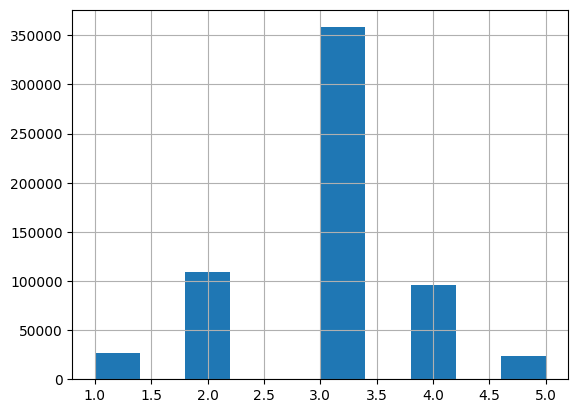

In [31]:
df_inmuebles['habitaciones'].hist()

## Baños

In [38]:
df_inmuebles.groupby(['banos']).agg(count=('id', 'count'))

,count
banos,
1,29378
2,225835
3,131783
4,70559
5,33160


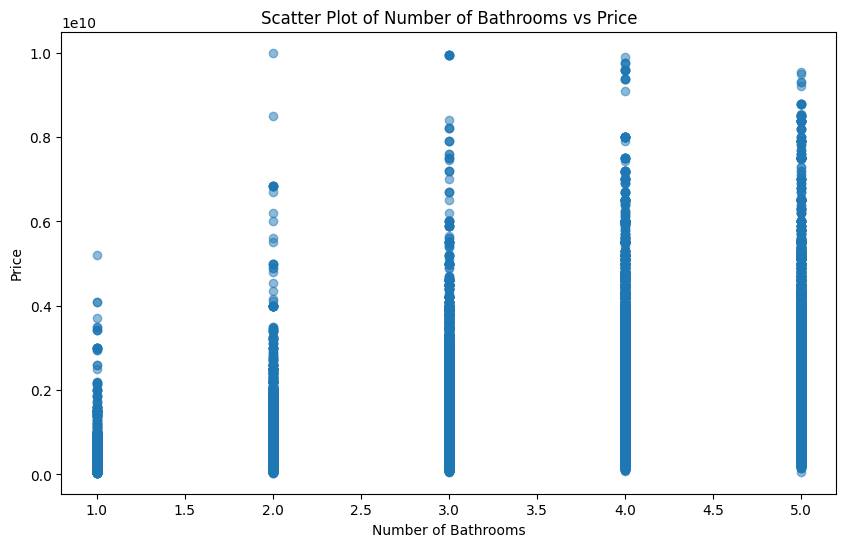

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df_inmuebles['banos'], df_inmuebles['precio'], alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

# Show plot
plt.show()

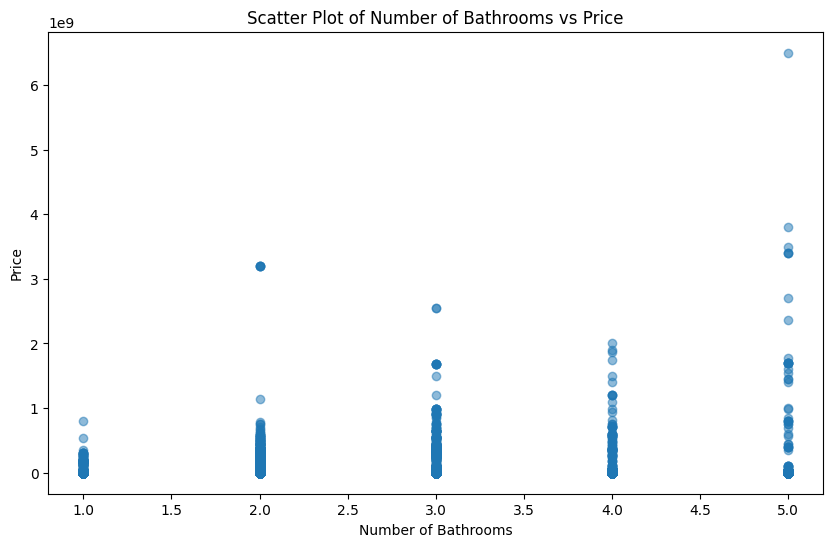

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df_inmuebles['banos'], df_inmuebles['precio_m2'], alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

# Show plot
plt.show()

## Área

<Axes: >

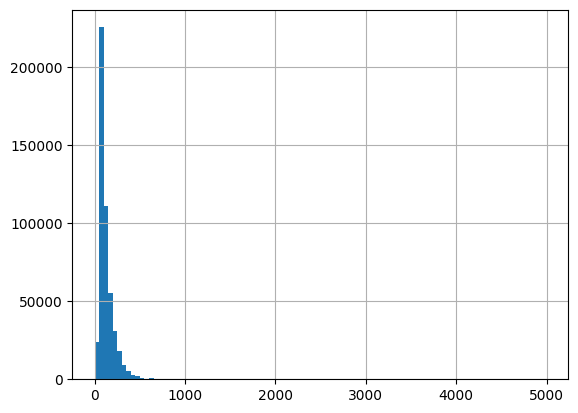

In [40]:
df_inmuebles['area'].hist(bins=100)

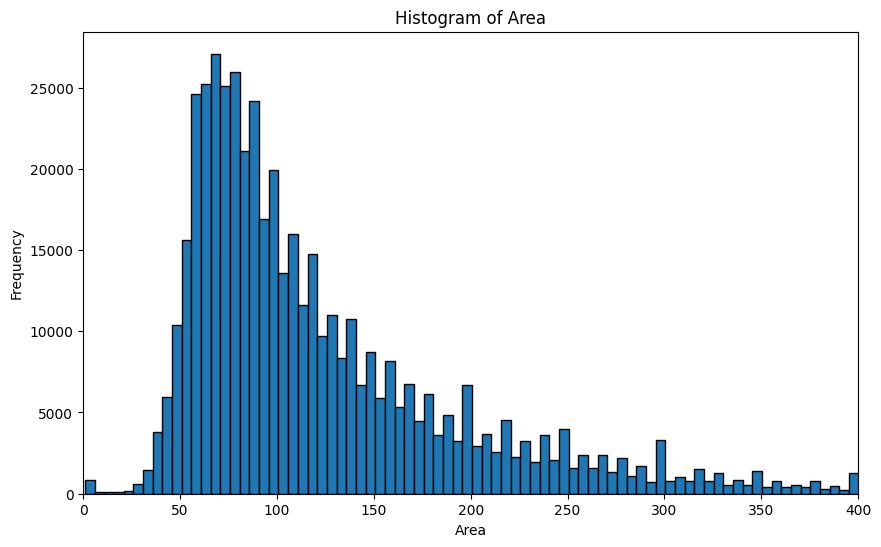

In [41]:
# Create a histogram of the 'area' column
plt.figure(figsize=(10, 6))
plt.hist(df_inmuebles['area'], bins=1000, edgecolor='black')

# Set the x-axis limits
plt.xlim(0, 400)  # Set xlim to desired values

# Add titles and labels
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [42]:
Q1 = df_inmuebles['area'].quantile(0.25)
Q2 = df_inmuebles['area'].quantile(0.50)
Q3 = df_inmuebles['area'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 72.0
Median (50th percentile): 100.0
Q3 (75th percentile): 157.0
IQR (Interquartile Range): 85.0
Lower Whisker: -55.5
Upper Whisker: 284.5


In [29]:
# Filtrar los inmuebles con menos de 20 m2 de area y con más de 296 m2 (+ 1.5 * IQR)
df_inmuebles = df_inmuebles[(df_inmuebles['area'] >= 20) & (df_inmuebles['area'] <= upper_whisker)]

## Ascensores

In [46]:
df_inmuebles.groupby(['num_ascensores']).agg(count=('id', 'count'))

,count
num_ascensores,
0,202276
1,255191


## Garajes

In [50]:
df_inmuebles.groupby(['garajes']).agg(count=('id', 'count'))

,count
garajes,
1,264408
2,160982
3,22930
4,7475
5,919
6,483
7,62
8,118
9,19


<Axes: >

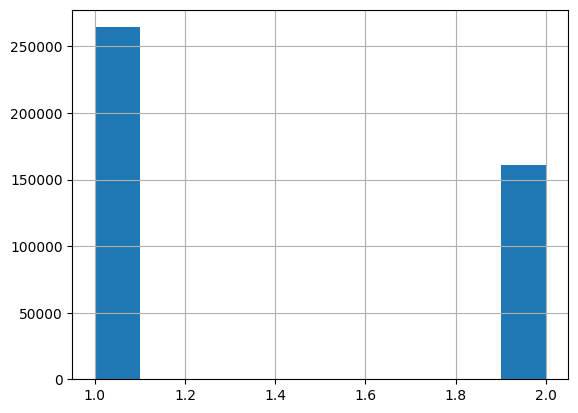

In [57]:
df_inmuebles['garajes'].hist(bins=10)

In [52]:
Q1 = df_inmuebles['garajes'].quantile(0.25)
Q2 = df_inmuebles['garajes'].quantile(0.50)
Q3 = df_inmuebles['garajes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 1.0
Median (50th percentile): 1.0
Q3 (75th percentile): 2.0
IQR (Interquartile Range): 1.0
Lower Whisker: -0.5
Upper Whisker: 3.5


In [53]:
df_inmuebles = df_inmuebles[(df_inmuebles['garajes'] >= 0) & (df_inmuebles['garajes'] <= 2)]

## Años Antigüedad

In [36]:
df_inmuebles['anos_antiguedad'].unique()

array([12,  4, 30, 23,  1], dtype=int64)

In [37]:
df_inmuebles.groupby(['anos_antiguedad']).agg(count=('id', 'count'))

,count
anos_antiguedad,
1,35390
4,215525
12,123858
23,129094
30,46411


## Tipo Inmueble

In [58]:
df_inmuebles.groupby(['tipo_inmueble']).agg(count=('id', 'count'))

,count
tipo_inmueble,
apartamento,359639
casa,65751


## Precio

In [19]:
df_inmuebles['precio'].describe()

count    6.344140e+05
mean     5.790715e+08
std      5.578339e+08
min      4.000000e+07
25%      2.700000e+08
50%      4.050000e+08
75%      6.700000e+08
max      1.000000e+10
Name: precio, dtype: float64

<Axes: >

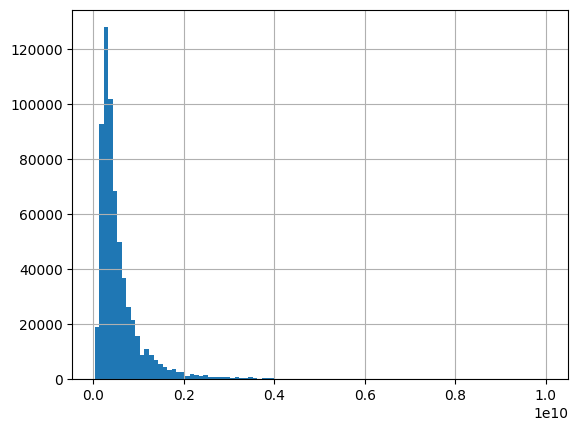

In [ ]:
df_inmuebles['precio'].hist(bins=100)

In [49]:
Q1 = df_inmuebles['precio'].quantile(0.25)
Q2 = df_inmuebles['precio'].quantile(0.50)
Q3 = df_inmuebles['precio'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 263000000.0
Median (50th percentile): 382000000.0
Q3 (75th percentile): 600000000.0
IQR (Interquartile Range): 337000000.0
Lower Whisker: -242500000.0
Upper Whisker: 1105500000.0


In [38]:
df_inmuebles.sort_values(by='precio', ascending=False)

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
535537,4582558,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,2,55.0,1.000000e+10,0,1,23,casa,POINT (-74.16308 4.62431),1.818182e+08
180267,3008231,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
439851,3098995,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
76268,3375647,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
751214,3928060,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583058,396798,ANTIOQUIA,SABANETA,3,2,50.0,4.000000e+07,0,1,4,apartamento,POINT (-75.60659 6.15441),8.000000e+05
352802,1348684,HUILA,NEIVA,3,1,100.0,4.000000e+07,0,1,23,casa,POINT (-75.25076 2.95211),4.000000e+05
92581,2218402,CUNDINAMARCA,SOACHA,3,1,50.0,4.000000e+07,0,1,4,apartamento,POINT (-74.21539 4.60206),8.000000e+05
261576,1004710,TOLIMA,PRADO,2,1,72.0,4.000000e+07,0,1,12,casa,POINT (-74.92272 3.75271),5.555556e+05


In [52]:
df_inmuebles = df_inmuebles[(df_inmuebles['precio'] <= upper_whisker)]

<Axes: >

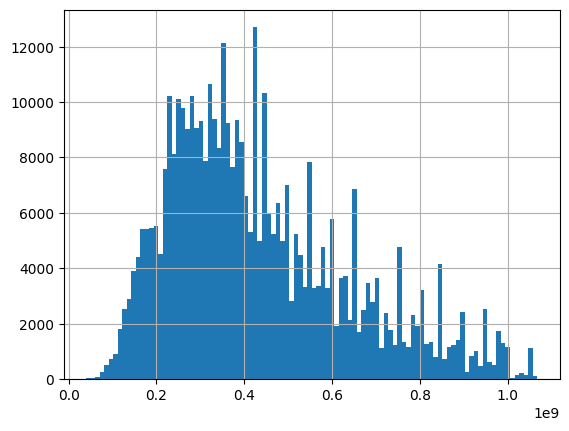

In [63]:
df_inmuebles['precio'].hist(bins=100)

## Precio por M2

In [57]:
Q1 = df_inmuebles['precio_m2'].quantile(0.25)
Q2 = df_inmuebles['precio_m2'].quantile(0.50)
Q3 = df_inmuebles['precio_m2'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 3017543.8596491227
Median (50th percentile): 4000000.0
Q3 (75th percentile): 5083333.333333333
IQR (Interquartile Range): 2065789.4736842103
Lower Whisker: -81140.3508771928
Upper Whisker: 8182017.5438596485


<Axes: >

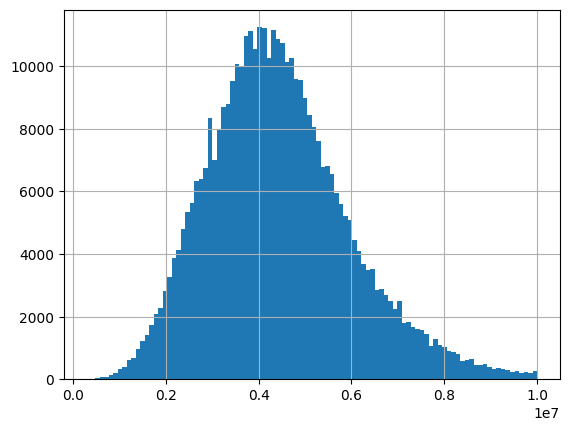

In [71]:
df_inmuebles['precio_m2'].hist(bins=100)

In [54]:
df_inmuebles.sort_values(by='precio_m2', ascending=False)

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
552868,3407922,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
708569,3119497,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
345311,4386013,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
812298,3959376,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
137798,2801675,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768892,561773,META,PUERTO LÓPEZ,4,3,251.0,6.666667e+07,0,1,4,casa,POINT (-72.95595 4.09059),2.656042e+05
415780,656308,CAUCA,PÁEZ,3,2,266.0,7.000000e+07,0,2,4,casa,POINT (-75.91174 2.67459),2.631579e+05
618318,1366238,TOLIMA,LÉRIDA,2,1,200.0,5.000000e+07,0,1,23,casa,POINT (-74.91355 4.85243),2.500000e+05
255461,750821,TOLIMA,LÉRIDA,3,1,200.0,5.000000e+07,0,1,23,casa,POINT (-74.91367 4.85227),2.500000e+05


In [62]:
df_inmuebles= df_inmuebles[df_inmuebles['precio_m2'] <= 10e6]

<Axes: >

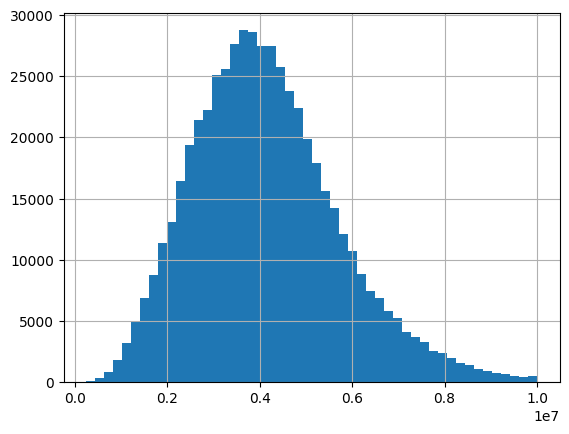

In [67]:
df_inmuebles['precio_m2'].hist(bins=50)

In [64]:
df_inmuebles.head()

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,POINT (-76.49500 3.36400),3.259259e+06
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,POINT (-75.60200 6.14300),5.111111e+06
2,3944108,CUNDINAMARCA,CAJICÁ,3,4,140.0,1.000000e+09,0,4,4,casa,POINT (-74.04343 4.89866),7.142857e+06
5,1556370,CUNDINAMARCA,ZIPAQUIRÁ,3,3,86.0,2.700000e+08,0,1,4,casa,POINT (-73.97115 5.01248),3.139535e+06
6,3732824,CUNDINAMARCA,CAJICÁ,3,4,196.0,8.300000e+08,0,4,4,casa,POINT (-74.03600 4.92500),4.234694e+06


In [65]:
df_inmuebles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 543725 entries, 0 to 882887
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               543725 non-null  int64   
 1   departamento     543725 non-null  object  
 2   municipio        543725 non-null  object  
 3   habitaciones     543725 non-null  int64   
 4   banos            543725 non-null  int64   
 5   area             543725 non-null  float64 
 6   precio           543725 non-null  float64 
 7   num_ascensores   543725 non-null  int64   
 8   garajes          543725 non-null  int64   
 9   anos_antiguedad  543725 non-null  int64   
 10  tipo_inmueble    543725 non-null  object  
 11  geometry         543725 non-null  geometry
 12  precio_m2        543725 non-null  float64 
dtypes: float64(3), geometry(1), int64(6), object(3)
memory usage: 58.1+ MB


## Transformación Final

In [80]:
# Time: 4 seconds
df_inmuebles = pd.read_csv('Data/inmuebles_full.csv')

In [81]:
# Create the geometry of the point - from longitud and latitud columns
# df_inmuebles['geometry'] = gpd.points_from_xy(x=df_inmuebles['longitud'], y=df_inmuebles['latitud'])

# Create a new variable precio por m2
df_inmuebles['precio_m2'] = df_inmuebles['precio'] / df_inmuebles['area']

# Make it a GeoDataFrame
# df_inmuebles = gpd.GeoDataFrame(df_inmuebles, geometry='geometry')

# Filtrar filas sin habitaciones, al ser una de las variables claves no se analizan posibles imputaciones para no dañar la muestra
df_inmuebles = df_inmuebles[~df_inmuebles['habitaciones'].isna()]

# Habitaciones como entero
df_inmuebles['habitaciones'] = df_inmuebles['habitaciones'].astype('int64')

# Solo negocios de venta
df_inmuebles = df_inmuebles[df_inmuebles['tiponegocio'] == 'venta']

# Drop useless columns
df_inmuebles.drop(['latitud', 'longitud', 'fecha_creacion', 'direccion', 'tiponegocio'], axis=1, inplace=True)

# Drop Departamento
df_inmuebles.drop('departamento', axis=1, inplace=True)

# Filtrar los municipios importantes (80%)
a = df_inmuebles.groupby(['municipio']).agg(count=('id', 'count')).sort_values(by='count', ascending=False)
a['perc'] = a['count'] / a['count'].sum()
a['cum_perc'] = a['perc'].cumsum()
a['filtro'] = 0
a.loc[a['cum_perc'] <= 0.8, 'filtro'] = 1
a.reset_index(inplace=True)
df_inmuebles = pd.merge(
    df_inmuebles,
    a[['municipio', 'filtro']],
    how='left',
    on='municipio',
)
df_inmuebles = df_inmuebles[df_inmuebles['filtro'] == 1]
df_inmuebles.drop('filtro', axis=1, inplace=True)

# Filtrar las filas con 0 habitaciones y más de 10 habitaciones
df_inmuebles = df_inmuebles[(df_inmuebles['habitaciones'] >= 1) & ((df_inmuebles['habitaciones'] <= 5))]

# Banos se queda igual

# Filtrar outliers de Area
Q1 = df_inmuebles['area'].quantile(0.25)
Q2 = df_inmuebles['area'].quantile(0.50)
Q3 = df_inmuebles['area'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df_inmuebles = df_inmuebles[(df_inmuebles['area'] >= 20) & (df_inmuebles['area'] <= upper_whisker)]

# Num Ascensores se queda igual

# Filtrar los inmuebles con más de 2 garajes
df_inmuebles = df_inmuebles[(df_inmuebles['garajes'] >= 0) & (df_inmuebles['garajes'] <= 2)]

# Anos antiguedad se queda igual

# Tipo Inmueble se queda igual

# Filtrar precios outliers
Q1 = df_inmuebles['precio'].quantile(0.25)
Q2 = df_inmuebles['precio'].quantile(0.50)
Q3 = df_inmuebles['precio'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df_inmuebles = df_inmuebles[(df_inmuebles['precio'] <= upper_whisker)]

# Filtrar precio_m2 outliers
Q1 = df_inmuebles['precio_m2'].quantile(0.25)
Q2 = df_inmuebles['precio_m2'].quantile(0.50)
Q3 = df_inmuebles['precio_m2'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df_inmuebles= df_inmuebles[df_inmuebles['precio_m2'] <= 10e6]

# Quitar columnas
df_inmuebles.drop(['id'], axis=1, inplace=True)

categoricas = ['municipio', 'tipo_inmueble']
numericas = ['habitaciones', 'banos', 'num_ascensores', 'garajes', 'area', 'anos_antiguedad']
precios = ['precio', 'precio_m2']
df_inmuebles = df_inmuebles[categoricas + numericas + precios]

In [82]:
df_inmuebles

,municipio,tipo_inmueble,habitaciones,banos,num_ascensores,garajes,area,anos_antiguedad,precio,precio_m2
0,CALI,apartamento,3,2,0,1,81.0,12,264000000.0,3.259259e+06
1,SABANETA,apartamento,2,3,1,2,90.0,4,460000000.0,5.111111e+06
8,CALI,apartamento,3,2,1,1,90.0,4,320000000.0,3.555556e+06
15,SABANETA,apartamento,3,3,1,2,106.0,4,541000000.0,5.103774e+06
17,PEREIRA,apartamento,3,2,1,1,70.0,4,270000000.0,3.857143e+06
...,...,...,...,...,...,...,...,...,...,...
633859,CALI,casa,4,5,0,2,216.0,12,680000000.0,3.148148e+06
633862,CALI,apartamento,3,2,0,2,75.0,4,450000000.0,6.000000e+06
633864,CALI,apartamento,3,3,0,2,113.0,4,560000000.0,4.955752e+06
633867,CALI,casa,3,5,0,2,164.0,12,785000000.0,4.786585e+06


In [83]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403029 entries, 0 to 633869
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   municipio        403029 non-null  object 
 1   tipo_inmueble    403029 non-null  object 
 2   habitaciones     403029 non-null  int64  
 3   banos            403029 non-null  int64  
 4   num_ascensores   403029 non-null  int64  
 5   garajes          403029 non-null  int64  
 6   area             403029 non-null  float64
 7   anos_antiguedad  403029 non-null  int64  
 8   precio           403029 non-null  float64
 9   precio_m2        403029 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 33.8+ MB
